# 911 Calls - Kaggle Dataset
## Exploratory Data Analysis (First Data Set)

Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

### Summary of Analyis (Findings):

By exploring this data set and visualising it, a number of insights were found.
The most requested type of response dispatched in Montgomery, PA is the Emergency Medical Services (EMS), followed by Traffic and then Fire Services. 
The number one requested reason for 911 assistance are traffic vehicle accidents, with nearly 12 500 more responses than the next most common reason, a disabled vehicle. 
If you look at the number of unique values found for the title column, there were 147 unique values. When visualising the outcomes for EMS, traffic and fire responses individually it was easy to see that fire and traffic services were concentrated across far fewer reasons for their call-outs. While EMS services were the most requested response for 911 calls, the reason for their calls were split across many different kinds of medical emergencies. The top 3 response reasons for EMS services being for fall victims, respiratory and cardiac emergencies in that order. 

The day of the week did not see significant increases on the weekends. I was expecting far higher responses by 911 on the weekends. The number of responses remained relatively the same across Monday to Thursday, with an increase on Friday and then a decline over the weekend (Sat - Sun). My assumption was that on weekends individuals would engage in activities related to alcohol consumption and therefore increase the number of 911 callouts. 
However as the primary reason for Traffic Services callouts was vehicle accidents, when splitting our countplot by adding a hue for the type of responders, we can see that the biggest decline was for Traffic Services. This means that traffic accidents decreased over the weekends - likely due to decreased traffic on the roads as many individuals would not be commuting for work. 

When looking at the months as the year progresses, from Jan to December there appears to be a decline in the number of 911 calls around the middle of the year, with America’s seasons opposite to that of South Africa, this would be over there summer months. However as the year progresses towards the winter months and the festive season the number of calls increase sharply. As vehicle accidents are such a large component of total 911 calls, I visualised a line plot for traffic accidents to see if it followed the same trend. The trend was very similar and I think that the reason why 911 calls decrease in the summer months may be due to less vehicle accidents occurring in the summer months as the driving conditions are less hazardous. 

When evaluating the number of 911 calls across time there were two large spikes. Splitting these out into traffic, fire and EMS responses across time the biggest spikes were for traffic and fire. I suspect that there was some major road accident that required traffic and fire services to respond. As the months are closer to the winter months for Montgomery, PA I am less inclined to think that this is due to a fire that caused traffic problems like smoke on major roadways. 
The next significant peak, interestingly almost exactly a year later, only saw a significant increase in Traffic Services responses. This was most likely due a major accident or traffic issue.
Graphing for vehicle accidents across time confirms these assumptions. 

Looking at heatmaps of the day and hours helps us to find more detail on the day with the most calls - Friday. We can see from our heatmap that Friday from 15:00 to 18:00 are the most affected hours - this may be due to the amount of people commuting home from work at those times. 


### Data and Setup

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
df=pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638530 entries, 0 to 638529
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        638530 non-null  float64
 1   lng        638530 non-null  float64
 2   desc       638530 non-null  object 
 3   zip        561009 non-null  float64
 4   title      638530 non-null  object 
 5   timeStamp  638530 non-null  object 
 6   twp        638254 non-null  object 
 7   addr       638530 non-null  object 
 8   e          638530 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Data Insights

In [8]:
# Top 5 Zip Codes for 911 Calls
df.zip.value_counts().head()

19401.0    43685
19464.0    42081
19403.0    33524
19446.0    31032
19406.0    21612
Name: zip, dtype: int64

In [9]:
# Top 5 Townships for 911 Calls
df.twp.value_counts().head()

LOWER MERION    53608
ABINGTON        38484
NORRISTOWN      36019
UPPER MERION    34749
CHELTENHAM      29468
Name: twp, dtype: int64

In [10]:
# Number of Unique Acciden Descriptions (rough idea of number of accidents/response reasons)
df.title.nunique()

147

### Creating new features

In [11]:
#Create Column with responder type - EMS, Fire, Traffic
df['responders']=df.title.apply(lambda x: x.split(':')[0])

In [12]:
#Create Column with responder reason eg: DIABETIC EMERGENCY
df['response_reason']=df['title'].str.split(':').str[1].str.replace('-','').str.strip()

In [13]:
#Most common type of assistance requested
df.responders.value_counts().head()

EMS        319520
Traffic    223071
Fire        95939
Name: responders, dtype: int64

In [14]:
#Most common reason for requested assitance
df.response_reason.value_counts()

VEHICLE ACCIDENT         179805
DISABLED VEHICLE          46486
FIRE ALARM                36771
FALL VICTIM               33100
RESPIRATORY EMERGENCY     32966
                          ...  
FOOT PATROL                   1
HIT + RUN                     1
PRISONER IN CUSTODY           1
ANIMAL COMPLAINT              1
BARRICADED SUBJECT            1
Name: response_reason, Length: 88, dtype: int64

In [15]:
df.timeStamp = pd.to_datetime(df['timeStamp'])
df.timeStamp

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
638525   2020-05-21 14:22:06
638526   2020-05-21 14:25:17
638527   2020-05-21 14:28:56
638528   2020-05-21 14:26:08
638529   2020-05-21 14:27:04
Name: timeStamp, Length: 638530, dtype: datetime64[ns]

In [16]:
df['hour'] = df.timeStamp.apply(lambda x:x.hour)
df['month'] = df.timeStamp.apply(lambda x:x.month)
df['day'] = df.timeStamp.apply(lambda x:x.dayofweek)
df['year']= df.timeStamp.apply(lambda x:x.year)

In [17]:
df.day

0         3
1         3
2         3
3         3
4         3
         ..
638525    3
638526    3
638527    3
638528    3
638529    3
Name: day, Length: 638530, dtype: int64

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day']=df.day.map(dmap)

In [19]:
df.day

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
638525    Thu
638526    Thu
638527    Thu
638528    Thu
638529    Thu
Name: day, Length: 638530, dtype: object

### Visualising and Investigating Data

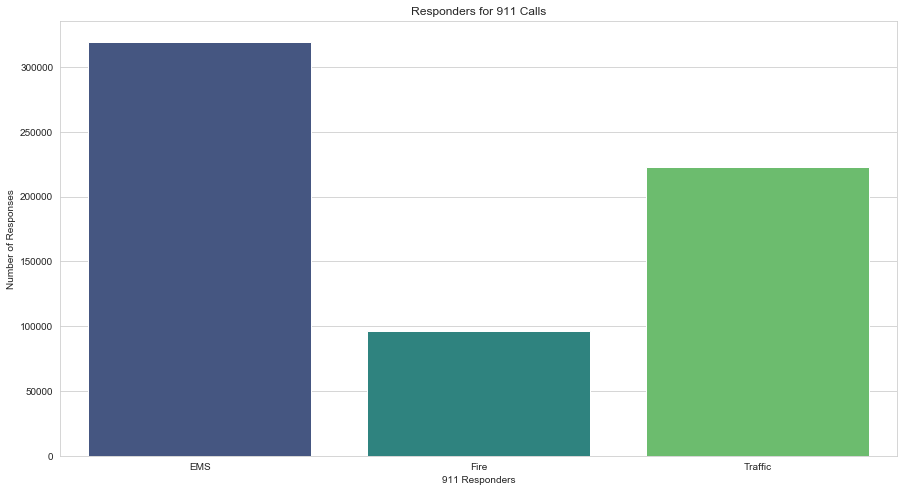

In [20]:
plt.figure(figsize=(15,8))
countgraph = sns.countplot(df.responders,palette='viridis')
countgraph.set_title('Responders for 911 Calls')
countgraph.set_xlabel('911 Responders')
countgraph.set_ylabel('Number of Responses')
plt.show()

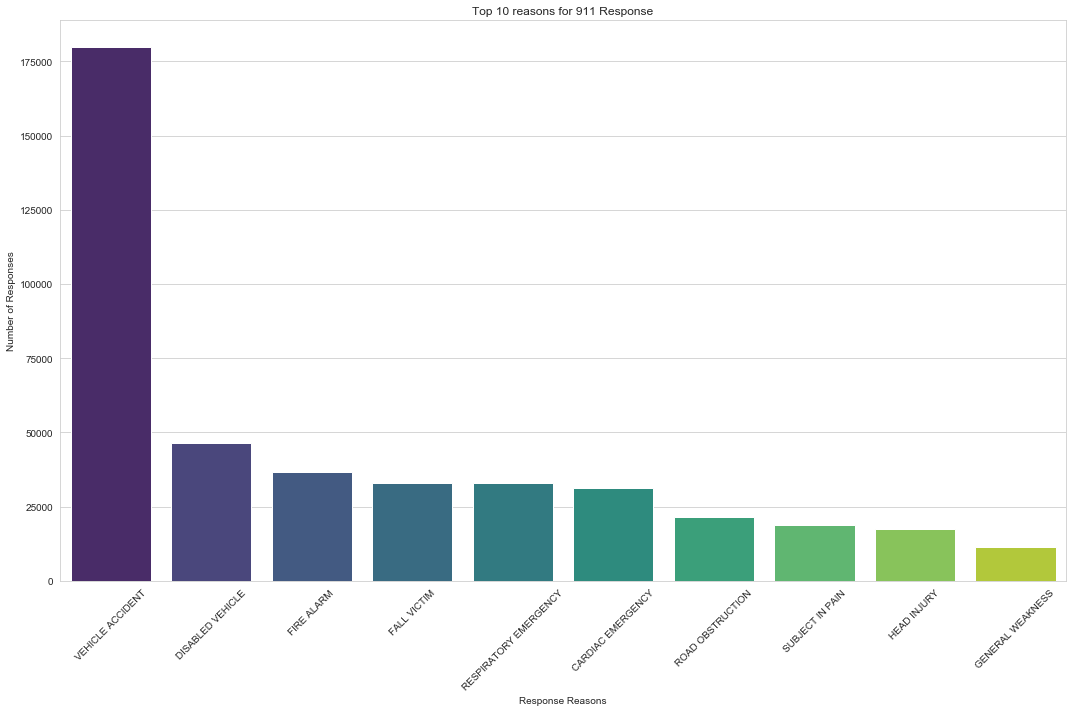

In [21]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(df.response_reason, order=df.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for 911 Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

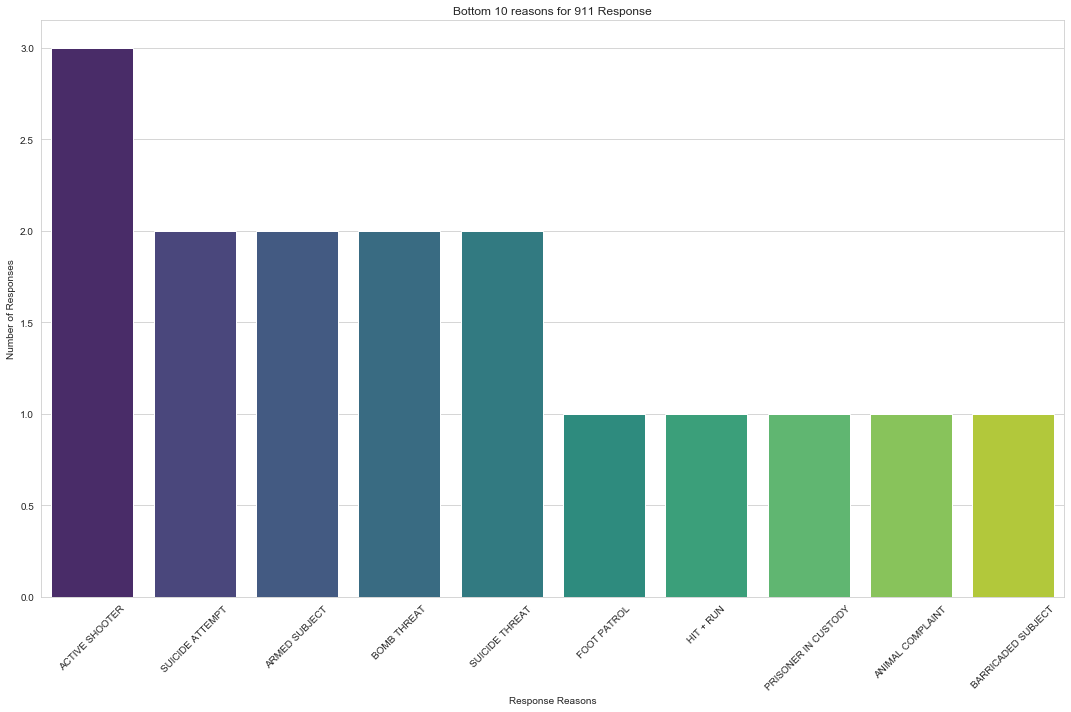

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(df.response_reason, order=df.response_reason.value_counts().iloc[-10:].index,palette='viridis')
countgraph.set_title('Bottom 10 reasons for 911 Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

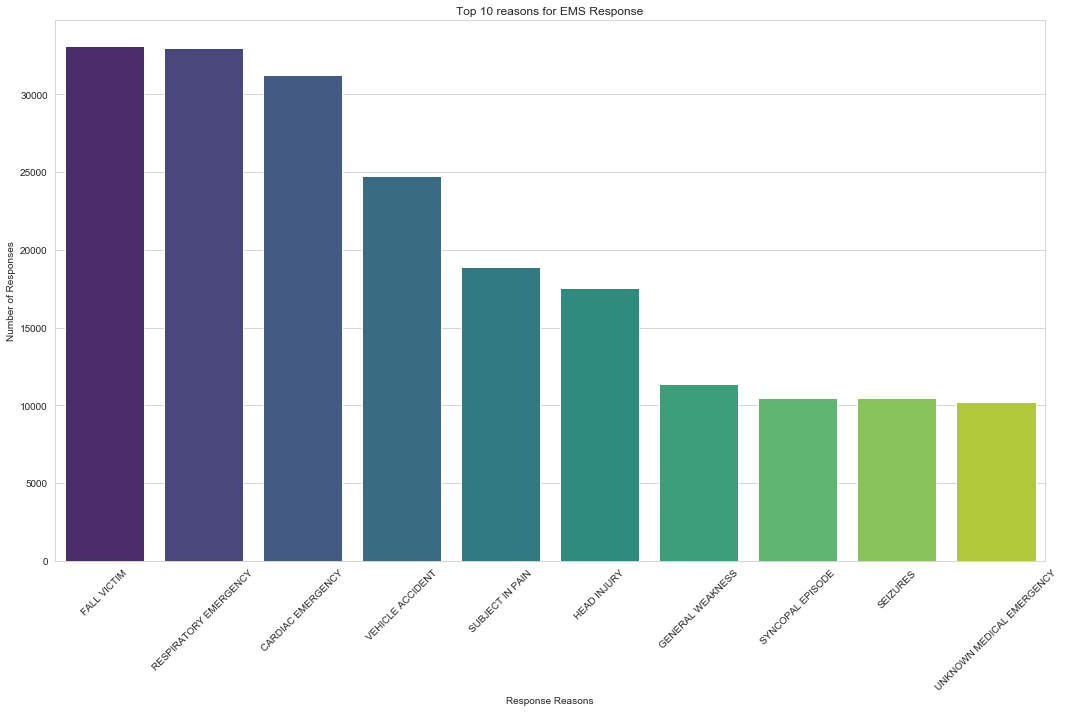

In [23]:
dfems = df[df.responders=='EMS']
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(dfems.response_reason, order=dfems.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for EMS Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

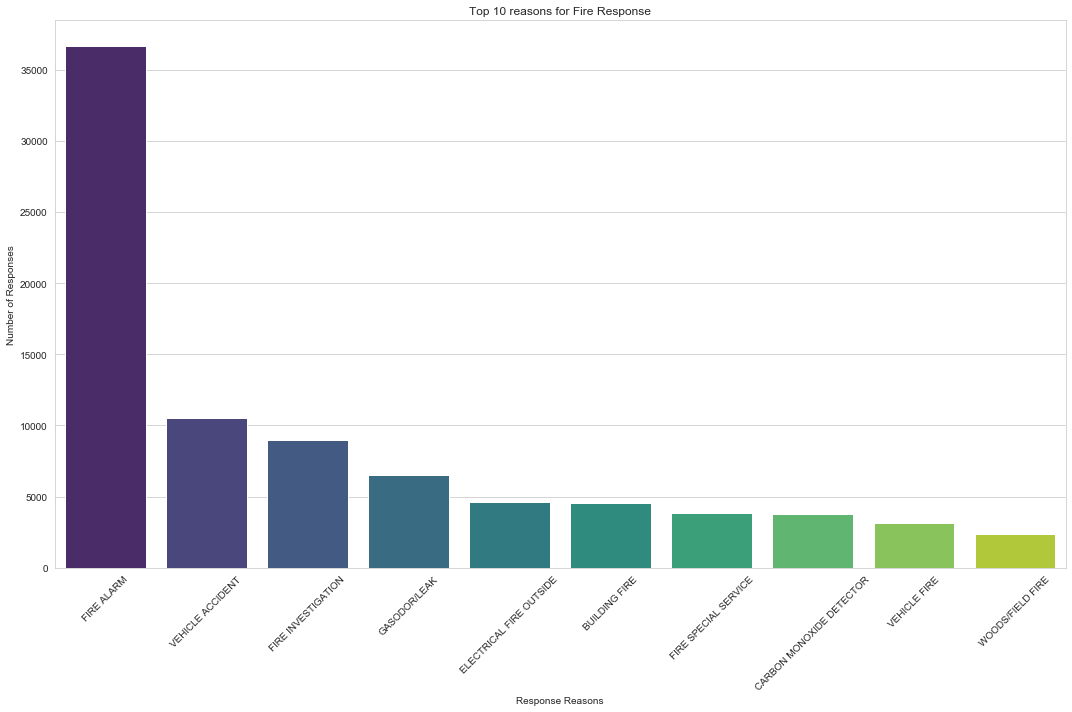

In [24]:
dffire = df[df.responders=='Fire']
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(dffire.response_reason, order=dffire.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for Fire Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

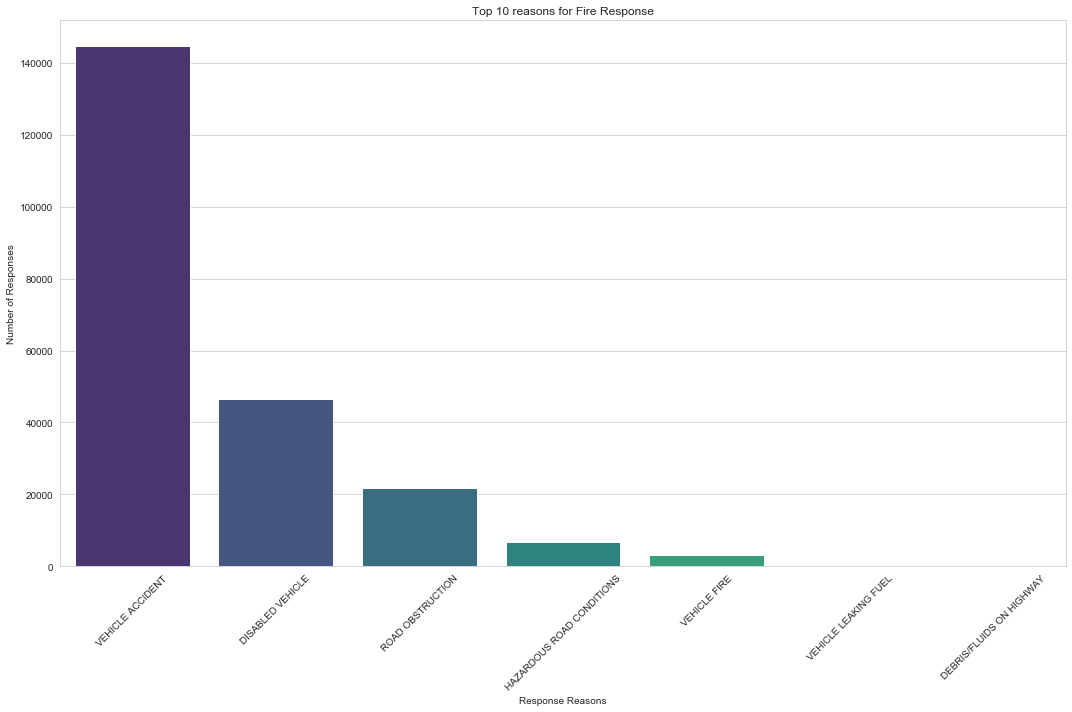

In [202]:
dftraffic = df[df.responders=='Traffic']
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(dftraffic.response_reason, order=dftraffic.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for Fire Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

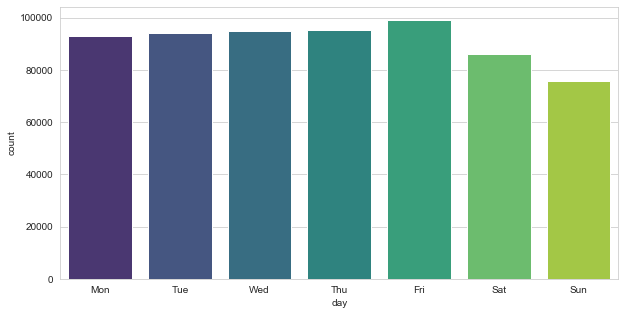

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df,palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

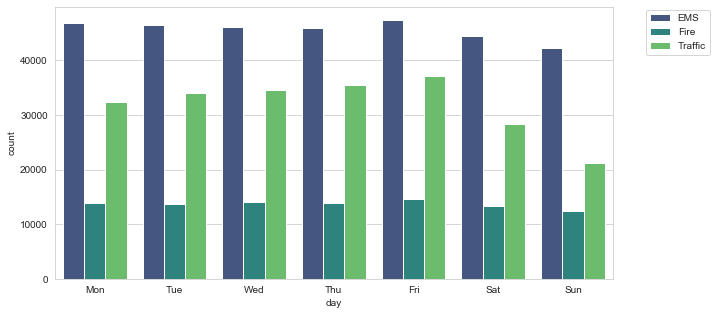

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df,hue='responders',palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend(bbox_to_anchor=(1.05, 1.009), loc=2)
plt.show()

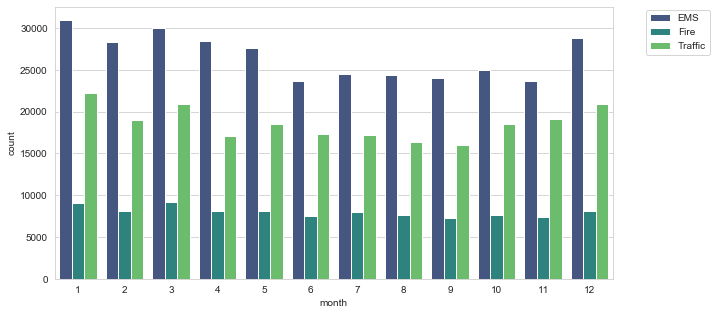

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df,hue='responders',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.009), loc=2)
plt.show()

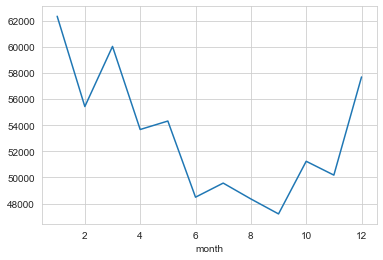

In [75]:
bymonth = df.groupby('month').count()
bymonth['responders'].plot(grid=True)

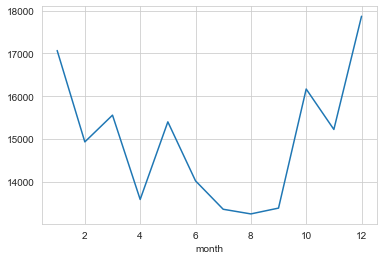

In [30]:
bymonth = df[df['response_reason']=='VEHICLE ACCIDENT'].groupby('month').count()
bymonth['responders'].plot(grid=True)

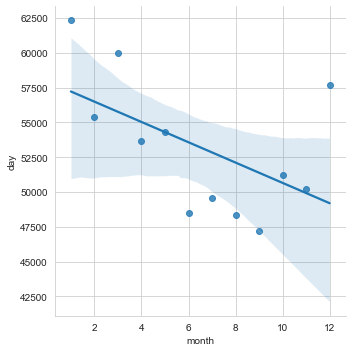

In [76]:
sns.lmplot(x='month',y='day',data=bymonth.reset_index())

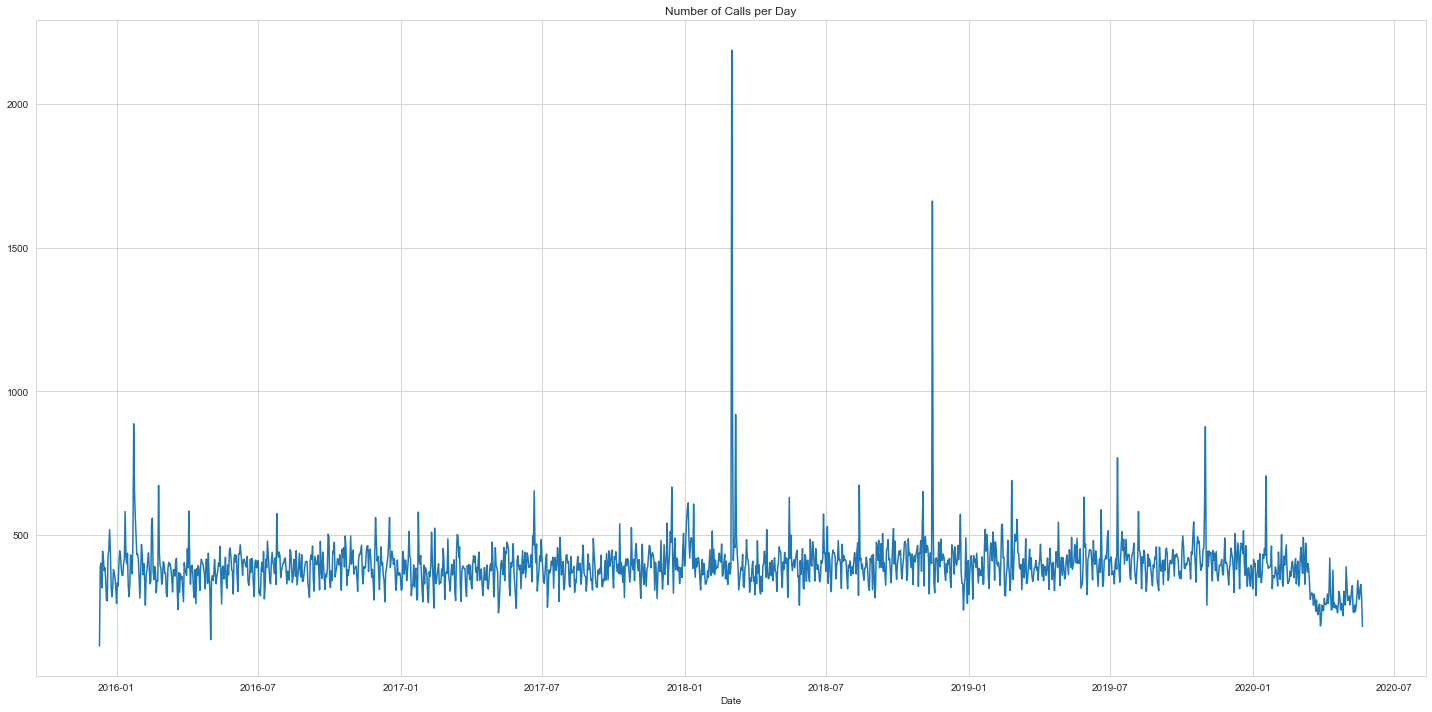

In [35]:
df['Date']=df.timeStamp.apply(lambda x:x.date())
plt.figure(figsize=(20,10))
x = df.groupby('Date').count()['responders'].plot()
x.set_title('Number of Calls per Day')
plt.tight_layout()

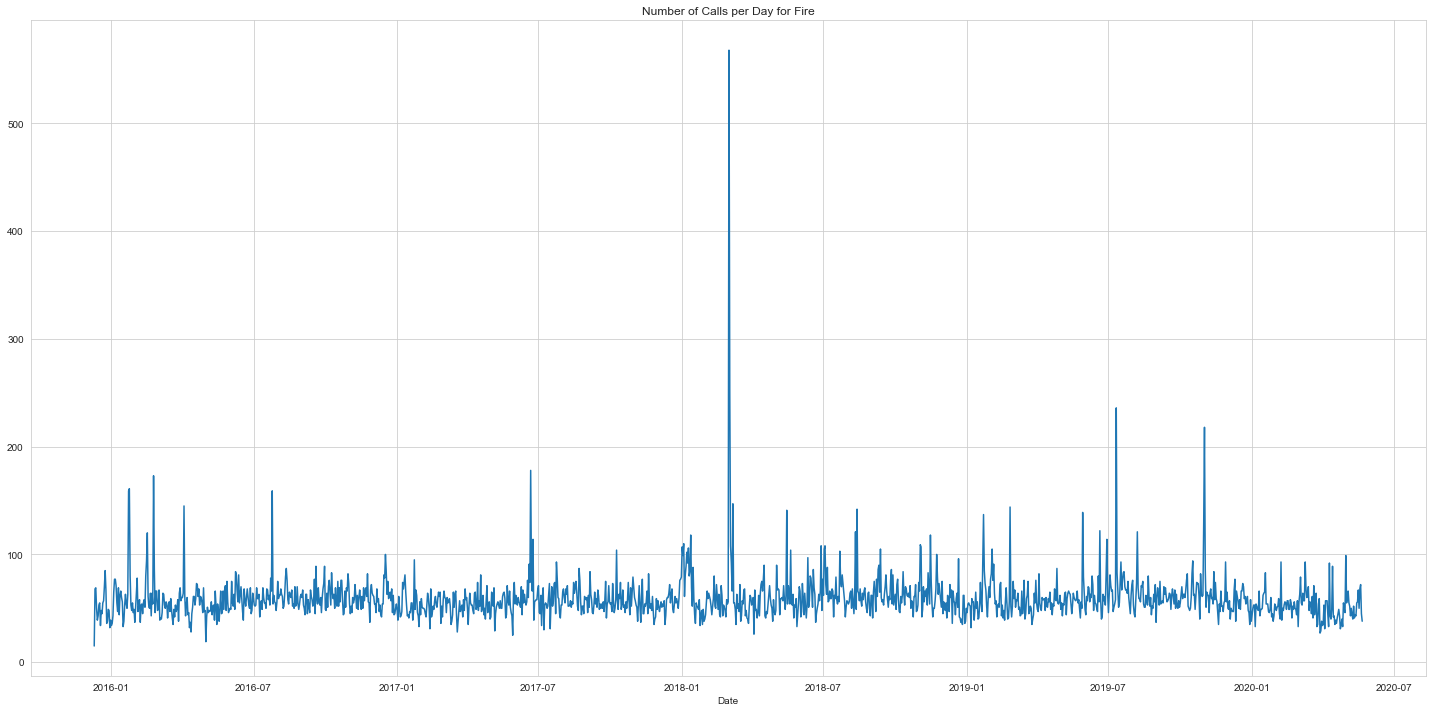

In [37]:
plt.figure(figsize=(20,10))
FirePlot = df[df.responders=='Fire'].groupby('Date').count()['responders'].plot()
FirePlot.set_title('Number of Calls per Day for Fire')
plt.tight_layout()

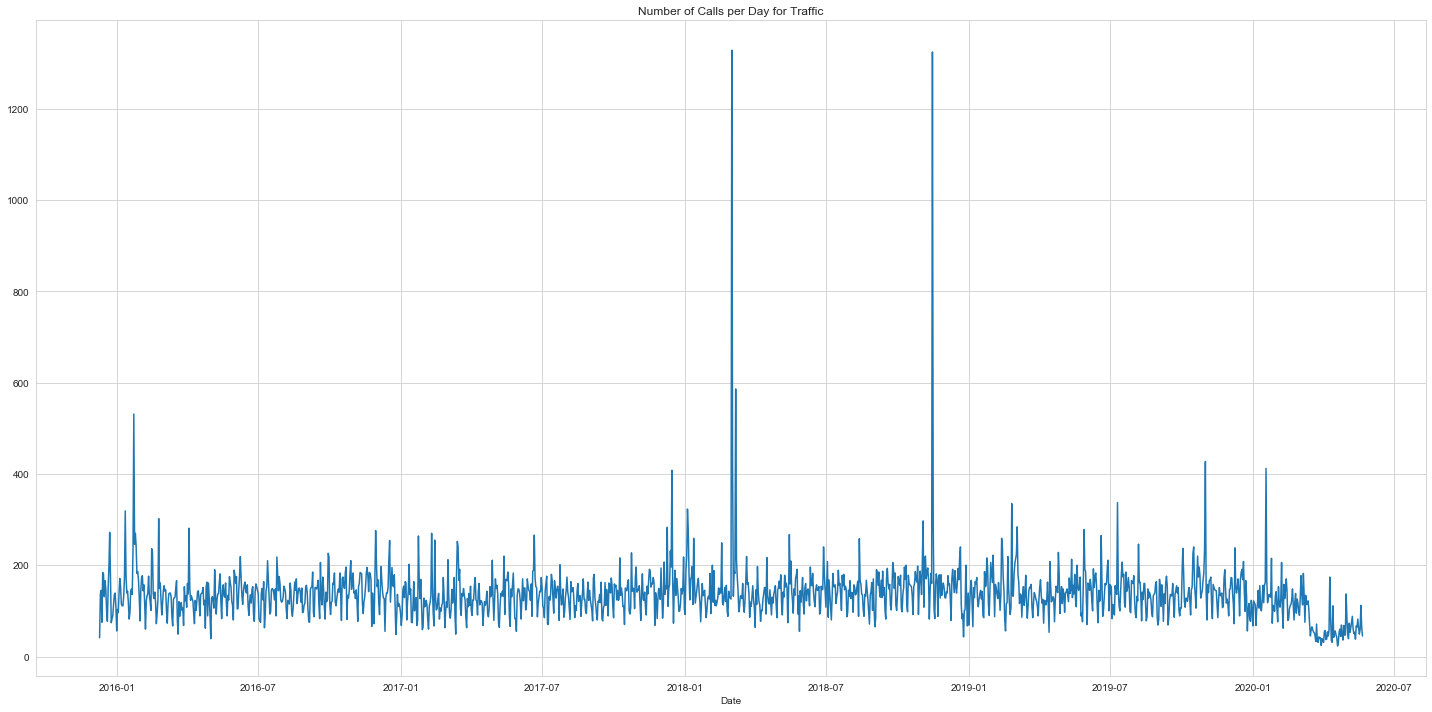

In [38]:
plt.figure(figsize=(20,10))
TrafficPlot = df[df.responders=='Traffic'].groupby('Date').count()['responders'].plot()
TrafficPlot.set_title('Number of Calls per Day for Traffic')
plt.tight_layout()

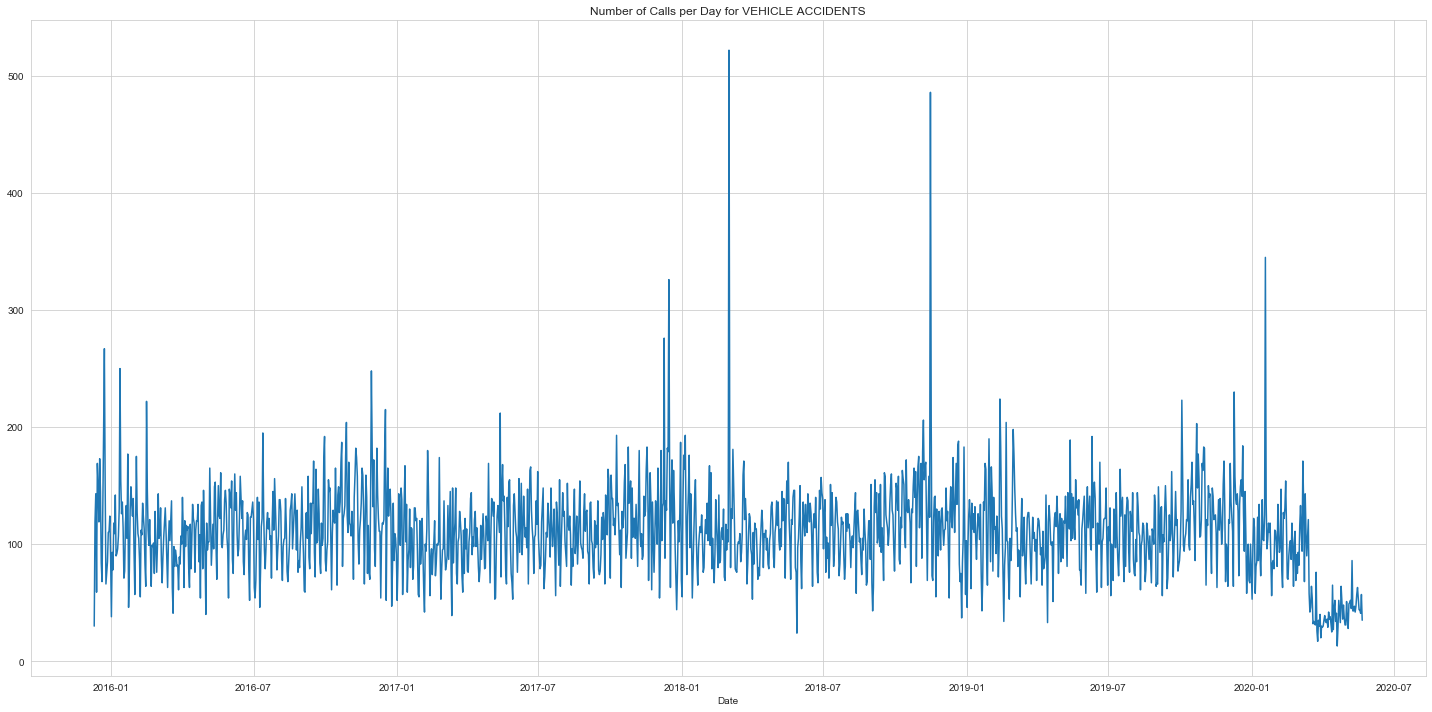

In [40]:
plt.figure(figsize=(20,10))
AccidentPlot = df[df.response_reason=='VEHICLE ACCIDENT'].groupby('Date').count()['responders'].plot()
AccidentPlot.set_title('Number of Calls per Day for VEHICLE ACCIDENTS')
plt.tight_layout()

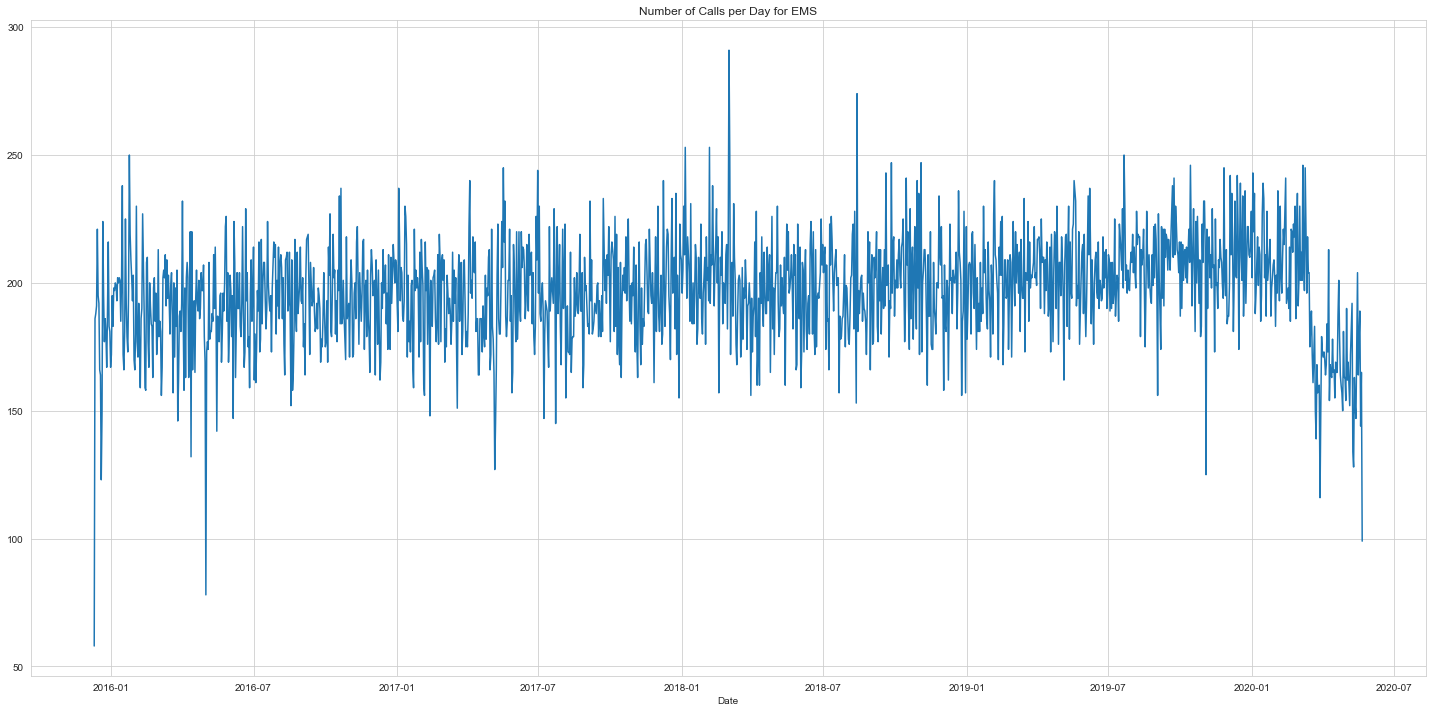

In [41]:
plt.figure(figsize=(20,10))
FirePlot = df[df.responders=='EMS'].groupby('Date').count()['responders'].plot()
FirePlot.set_title('Number of Calls per Day for EMS')
plt.tight_layout()

In [88]:
dayhour = df.groupby(by=['day','hour']).count()['responders'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,1905,1560,1387,1255,1276,1576,2587,4032,4873,5109,...,6129,6761,6838,6863,5458,4856,4199,3727,3292,2749
Mon,1820,1496,1311,1229,1292,1776,2597,4315,5368,5552,...,5446,5967,6132,6195,5244,4324,3632,3116,2558,1994
Sat,2336,1976,1818,1535,1389,1510,1811,2409,3339,4173,...,5213,4975,5018,4995,4802,4596,3975,3741,3094,2850
Sun,2338,2068,1874,1558,1419,1423,1679,2315,2906,3591,...,4544,4301,4386,4338,4221,4001,3594,3012,2506,2227
Thu,1648,1353,1357,1187,1217,1707,2727,4324,5170,5219,...,5855,6232,6145,6712,5315,4535,3925,3361,2727,2267


In [89]:
monthday = df.groupby(by=['day','month']).count()['responders'].unstack()
monthday.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8209,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7607,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,6597,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6191,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8309,7850,6964,7508,6954,7482,8358,8151


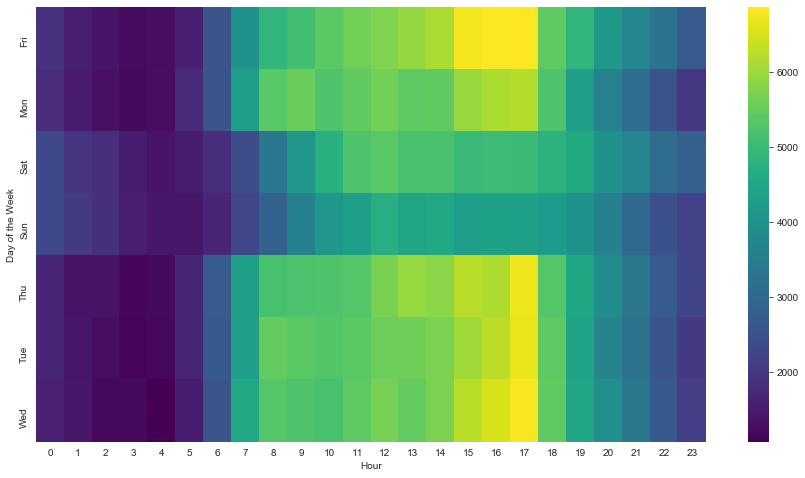

In [90]:
plt.figure(figsize=(15,8))
x = sns.heatmap(dayhour,cmap='viridis')
x.set(xlabel='Hour',ylabel='Day of the Week')
plt.show()

<Figure size 1440x720 with 0 Axes>

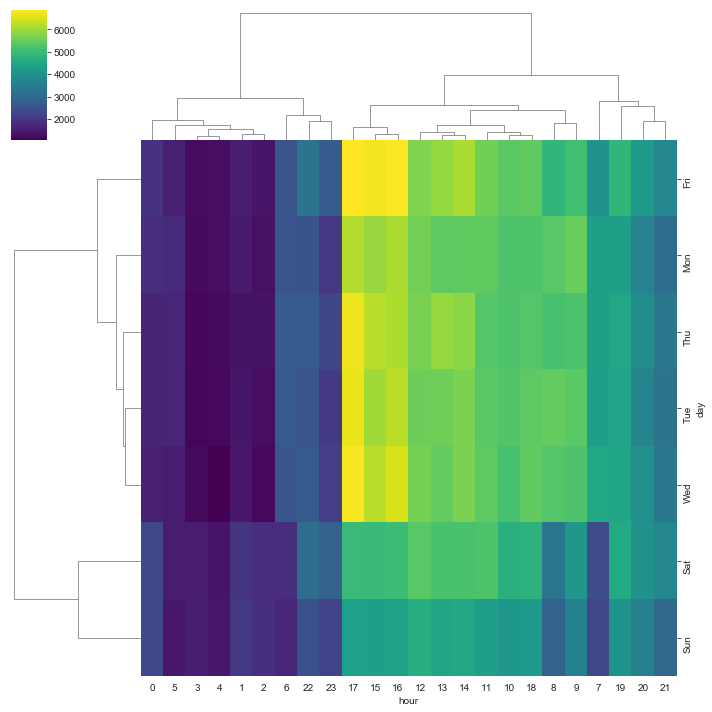

In [91]:
plt.figure(figsize=(20,10))
y = sns.clustermap(dayhour,cmap='viridis')
x.set(xlabel='Hour',ylabel='Day of the Week')
plt.show()

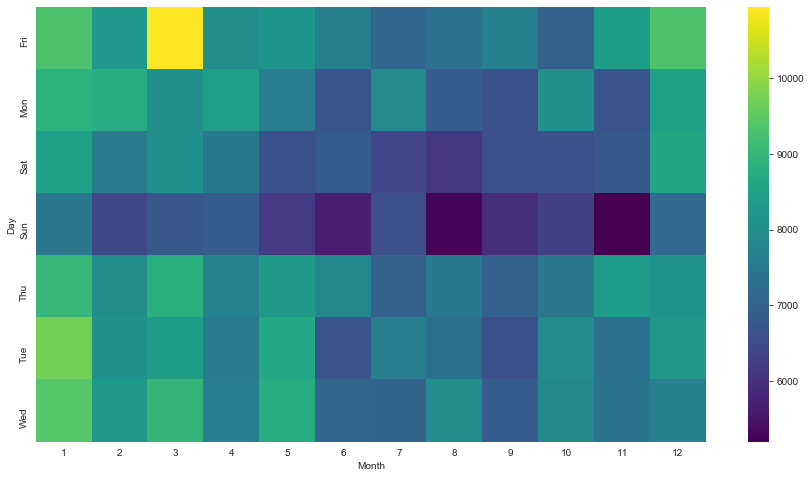

In [92]:
plt.figure(figsize=(15,8))
x = sns.heatmap(monthday,cmap='viridis')
x.set(xlabel='Month',ylabel='Day')
plt.show()

<Figure size 1080x576 with 0 Axes>

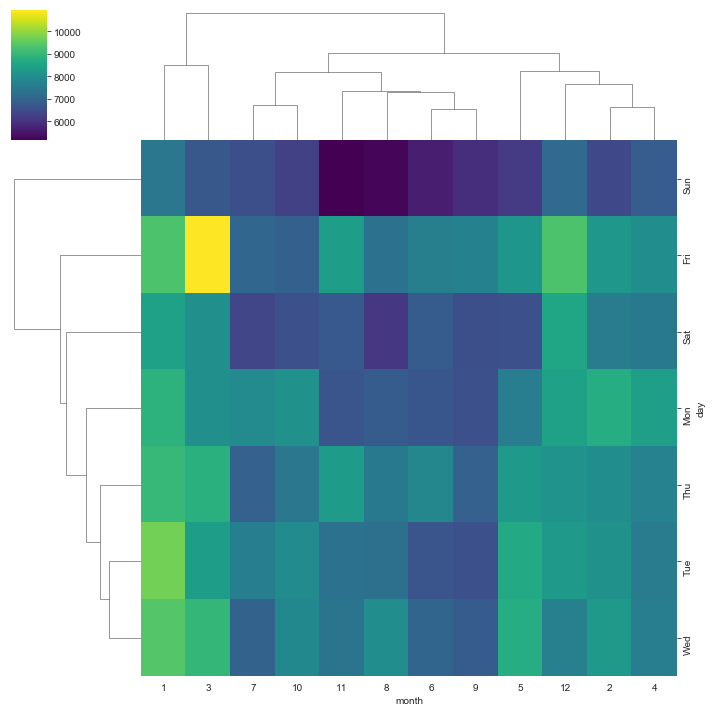

In [212]:
plt.figure(figsize=(15,8))
y = sns.clustermap(monthday,cmap='viridis')
x.set(xlabel='Hour',ylabel='Month')
plt.show()

## END OF MY FIRST KAGGLE DATA SET EDA :)